In [2798]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
import tensorflow as tf

In [2799]:
# Read in data into a dataframe
data = pd.read_csv('ebw_data.csv')

# Display top of dataframe
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [2800]:
data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


<AxesSubplot: >

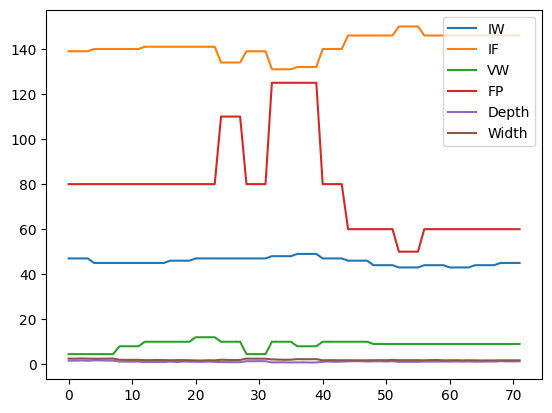

In [2801]:
data.plot()

In [2802]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [2803]:
# Find duplicates
data[data.duplicated()]

,IW,IF,VW,FP,Depth,Width
11,45,140,8.0,80,1.20,1.96
31,47,139,4.5,80,1.36,2.48
46,46,146,10.0,60,1.36,1.76
54,43,150,9.0,50,1.08,1.82
55,43,150,9.0,50,1.08,1.82
59,44,146,9.0,60,1.20,1.76
70,45,146,9.0,60,1.28,1.76


In [2804]:
# Drop duplicated rows, keep first
data = data.drop_duplicates(keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      65 non-null     int64  
 1   IF      65 non-null     int64  
 2   VW      65 non-null     float64
 3   FP      65 non-null     int64  
 4   Depth   65 non-null     float64
 5   Width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB


In [2805]:
# Find all correlations with the Width and sort
data.corr()['Width'].sort_values()

VW      -0.873454
IF      -0.492898
FP       0.394702
IW       0.413800
Depth    0.433860
Width    1.000000
Name: Width, dtype: float64

In [2806]:
# Find all correlations with the Width and sort
data.corr()['Depth'].sort_values()

VW      -0.687108
FP      -0.546500
IW      -0.341494
IF       0.421896
Width    0.433860
Depth    1.000000
Name: Depth, dtype: float64

<AxesSubplot: >

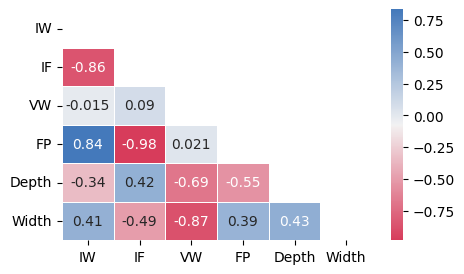

In [2807]:
# Correlation heatmap
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(5,3))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap=cmap, annot=True,linewidths=0.5, linecolor='white',mask=mask)

In [2808]:
# Separate out the features and targets
features = data.drop(columns=['Width', 'Depth'])
targets = data.drop(columns=['IF', 'FP', 'IW', 'VW'])

In [2809]:
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(45, 4) (20, 4)
(45, 2) (20, 2)


In [2810]:
# Data normalization
normalizer = Normalization(axis=-1)
normalizer.adapt(features)

2022-11-26 12:24:37.208158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-26 12:24:37.237961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [2811]:
model = Sequential([
    normalizer,
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_109 (Normaliz  (None, 4)                9         
 ation)                                                          
                                                                 
 dense_497 (Dense)           (None, 128)               640       
                                                                 
 dense_498 (Dense)           (None, 128)               16512     
                                                                 
 dense_499 (Dense)           (None, 128)               16512     
                                                                 
 dense_500 (Dense)           (None, 2)                 258       
                                                                 
Total params: 33,931
Trainable params: 33,922
Non-trainable params: 9
________________________________________________

In [2812]:
%%time
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=10)
# with tf.device("/GPU:0"):
#     history = model.fit(X_train, y_train, validation_split=0.1, epochs=2000, verbose=2, callbacks=[callback])
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=195, verbose=2)

Epoch 1/195


2022-11-26 12:24:37.763391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-26 12:24:38.486057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 - 1s - loss: 2.6666 - mae: 1.5613 - val_loss: 2.6804 - val_mae: 1.5744 - 1s/epoch - 594ms/step
Epoch 2/195
2/2 - 0s - loss: 2.1056 - mae: 1.3872 - val_loss: 2.1777 - val_mae: 1.4261 - 134ms/epoch - 67ms/step
Epoch 3/195
2/2 - 0s - loss: 1.6167 - mae: 1.2103 - val_loss: 1.6995 - val_mae: 1.2654 - 97ms/epoch - 48ms/step
Epoch 4/195
2/2 - 0s - loss: 1.1685 - mae: 1.0018 - val_loss: 1.2372 - val_mae: 1.0847 - 94ms/epoch - 47ms/step
Epoch 5/195
2/2 - 0s - loss: 0.8087 - mae: 0.8149 - val_loss: 0.8121 - val_mae: 0.8802 - 158ms/epoch - 79ms/step
Epoch 6/195
2/2 - 0s - loss: 0.5665 - mae: 0.6882 - val_loss: 0.4791 - val_mae: 0.6680 - 85ms/epoch - 43ms/step
Epoch 7/195
2/2 - 0s - loss: 0.4096 - mae: 0.5703 - val_loss: 0.2583 - val_mae: 0.4646 - 112ms/epoch - 56ms/step
Epoch 8/195
2/2 - 0s - loss: 0.3492 - mae: 0.4970 - val_loss: 0.1358 - val_mae: 0.3120 - 81ms/epoch - 41ms/step
Epoch 9/195
2/2 - 0s - loss: 0.3388 - mae: 0.4470 - val_loss: 0.0887 - val_mae: 0.2163 - 111ms/epoch - 56ms/step
E

Epoch 74/195
2/2 - 0s - loss: 0.0117 - mae: 0.0831 - val_loss: 0.0115 - val_mae: 0.0939 - 52ms/epoch - 26ms/step
Epoch 75/195
2/2 - 0s - loss: 0.0122 - mae: 0.0850 - val_loss: 0.0121 - val_mae: 0.0962 - 48ms/epoch - 24ms/step
Epoch 76/195
2/2 - 0s - loss: 0.0115 - mae: 0.0839 - val_loss: 0.0129 - val_mae: 0.0998 - 48ms/epoch - 24ms/step
Epoch 77/195
2/2 - 0s - loss: 0.0104 - mae: 0.0790 - val_loss: 0.0134 - val_mae: 0.1008 - 48ms/epoch - 24ms/step
Epoch 78/195
2/2 - 0s - loss: 0.0099 - mae: 0.0758 - val_loss: 0.0149 - val_mae: 0.1042 - 51ms/epoch - 25ms/step
Epoch 79/195
2/2 - 0s - loss: 0.0102 - mae: 0.0749 - val_loss: 0.0158 - val_mae: 0.1065 - 49ms/epoch - 24ms/step
Epoch 80/195
2/2 - 0s - loss: 0.0101 - mae: 0.0736 - val_loss: 0.0150 - val_mae: 0.1046 - 49ms/epoch - 24ms/step
Epoch 81/195
2/2 - 0s - loss: 0.0096 - mae: 0.0721 - val_loss: 0.0137 - val_mae: 0.1015 - 48ms/epoch - 24ms/step
Epoch 82/195
2/2 - 0s - loss: 0.0092 - mae: 0.0704 - val_loss: 0.0121 - val_mae: 0.0969 - 48ms/e

2/2 - 0s - loss: 0.0037 - mae: 0.0434 - val_loss: 0.0022 - val_mae: 0.0347 - 52ms/epoch - 26ms/step
Epoch 147/195
2/2 - 0s - loss: 0.0041 - mae: 0.0446 - val_loss: 0.0021 - val_mae: 0.0356 - 54ms/epoch - 27ms/step
Epoch 148/195
2/2 - 0s - loss: 0.0039 - mae: 0.0445 - val_loss: 0.0030 - val_mae: 0.0454 - 56ms/epoch - 28ms/step
Epoch 149/195
2/2 - 0s - loss: 0.0035 - mae: 0.0457 - val_loss: 0.0040 - val_mae: 0.0515 - 56ms/epoch - 28ms/step
Epoch 150/195
2/2 - 0s - loss: 0.0037 - mae: 0.0478 - val_loss: 0.0044 - val_mae: 0.0537 - 52ms/epoch - 26ms/step
Epoch 151/195
2/2 - 0s - loss: 0.0038 - mae: 0.0476 - val_loss: 0.0038 - val_mae: 0.0495 - 49ms/epoch - 25ms/step
Epoch 152/195
2/2 - 0s - loss: 0.0035 - mae: 0.0439 - val_loss: 0.0038 - val_mae: 0.0479 - 49ms/epoch - 24ms/step
Epoch 153/195
2/2 - 0s - loss: 0.0034 - mae: 0.0426 - val_loss: 0.0047 - val_mae: 0.0512 - 50ms/epoch - 25ms/step
Epoch 154/195
2/2 - 0s - loss: 0.0034 - mae: 0.0416 - val_loss: 0.0055 - val_mae: 0.0555 - 50ms/epoch 

In [2813]:
len(history.history['loss'])

195

In [2814]:
model.evaluate(X_train, y_train, batch_size=2, verbose=2)
model.evaluate(X_test, y_test, batch_size=2, verbose=2)
print()

23/23 - 0s - loss: 0.0031 - mae: 0.0399 - 371ms/epoch - 16ms/step
10/10 - 0s - loss: 0.0026 - mae: 0.0393 - 77ms/epoch - 8ms/step



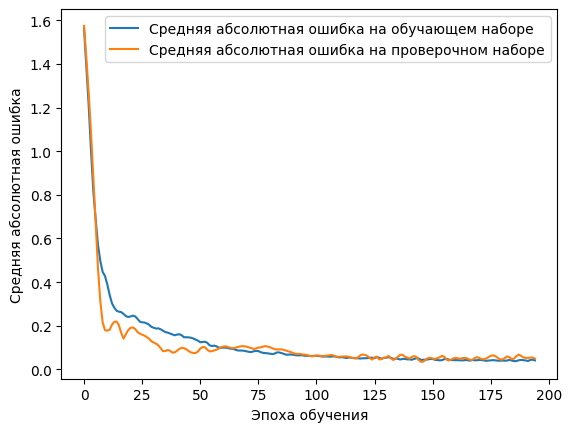

In [2815]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [2816]:
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 122ms/step
[[1.2350267  1.8012377 ]
 [1.2350267  1.8012377 ]
 [1.5210862  2.5170379 ]
 [1.2350267  1.8012377 ]
 [1.6799691  2.4844353 ]
 [1.2350267  1.8012377 ]
 [1.1298169  1.786276  ]
 [1.0240017  1.8461229 ]
 [1.3001729  1.7651752 ]
 [0.85829854 2.0684526 ]
 [0.85829854 2.0684526 ]
 [1.1716337  1.9641844 ]
 [1.1475787  1.7855427 ]
 [1.0240017  1.8461229 ]
 [0.8123725  2.2713723 ]
 [0.949055   1.9890611 ]
 [1.5210862  2.5170379 ]
 [1.1298169  1.786276  ]
 [1.1475787  1.7855427 ]
 [1.1716337  1.9641844 ]]


2022-11-26 12:24:50.364840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [2817]:
# Calculating R2 - the value of the coefficient of determination for the expected test model
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print(f'R2: {r2:.2f}')

R2: 0.96


In [2818]:
# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.04
Mean squared error: 0.00
Root mean squared error: 0.05


In [2819]:
# Save trained model
model.save("case_3_1_model")

INFO:tensorflow:Assets written to: case_3_1_model/assets


In [2820]:
# Load model from disk
test_model = tf.keras.models.load_model("case_3_1_model")

In [2821]:
# Test prediction with loaded model
test_y_pred = test_model.predict(X_test)
print(test_y_pred)

1/1 [==============================] - 0s 105ms/step
[[1.2350267  1.8012377 ]
 [1.2350267  1.8012377 ]
 [1.5210862  2.5170379 ]
 [1.2350267  1.8012377 ]
 [1.6799691  2.4844353 ]
 [1.2350267  1.8012377 ]
 [1.1298169  1.786276  ]
 [1.0240017  1.8461229 ]
 [1.3001729  1.7651752 ]
 [0.85829854 2.0684526 ]
 [0.85829854 2.0684526 ]
 [1.1716337  1.9641844 ]
 [1.1475787  1.7855427 ]
 [1.0240017  1.8461229 ]
 [0.8123725  2.2713723 ]
 [0.949055   1.9890611 ]
 [1.5210862  2.5170379 ]
 [1.1298169  1.786276  ]
 [1.1475787  1.7855427 ]
 [1.1716337  1.9641844 ]]


2022-11-26 12:24:51.778618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [2822]:
# Comparision predictions of both models
test_y_pred == y_pred

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])